In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
import kineticsPy as kpy

data_base_path = os.path.join('..','..','test','test_inputs')
result_base_path = os.path.join('..','usersguide','images')
water_cluster_input = os.path.join(data_base_path, 'WaterCluster_RoomTemp.cti')

def water_cluster_simulation():
    sim_result = kpy.cantera.simulate_isobar_adiabatic(
        water_cluster_input,
        'H2O:2.5e+14, N2:2.54e+17, H3O+:1e+10',
        10000, 2e-9, 100000)

    return sim_result

def simple_synthetic_trajectory():
    species_names = ["Cl1", "Cl2", "H2O"]
    times = np.linspace(0, 4, 100)
    c_cl1 = np.exp(times * 0.3)
    c_cl2 = 5 - c_cl1
    c_H2O = times * 0.1

    data_array = np.vstack([c_cl1, c_cl2, c_H2O]).transpose()
    attributes = {'temperature': 298}

    tra = kpy.Trajectory(
        species_names, times, data_array, attributes,
        concentration_unit='mol/m^3',
        time_scaling_factor=1e-6)

    return tra

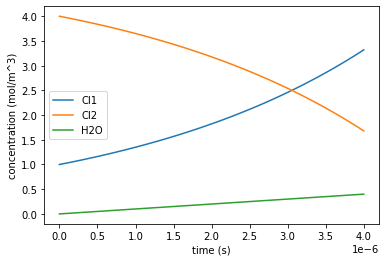

In [21]:
sim_result = simple_synthetic_trajectory()

# plot full trajectory:
kpy.plot(sim_result)
plt.savefig(os.path.join(result_base_path,'concentration_plot_base_01.svg'))